Exploratory data analysis (EDA) is a crucial component of data science which allows you to understand the basics of what your data looks like and what kinds of questions might be answered. For this task, we are going to clean, sanitise and explore our data using the movies dataset.

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the movies dataset 
movies_df = pd.read_csv('movies.csv')

In [4]:
columns_to_drop = ['homepage', 'keywords', 'original_language', 'original_title', 'overview', 'production_companies', 'status', 'tagline']
movies_df.drop(columns=columns_to_drop, inplace=True)
print(movies_df)

         budget                                             genres      id  \
0     237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   19995   
1     300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...     285   
2     245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...  206647   
3     250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   49026   
4     260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   49529   
...         ...                                                ...     ...   
4798     220000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...    9367   
4799       9000  [{"id": 35, "name": "Comedy"}, {"id": 10749, "...   72766   
4800          0  [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...  231617   
4801          0                                                 []  126186   
4802          0                [{"id": 99, "name": "Documentary"}]   25975   

      popularity                               production_count

In [5]:
# just to view remaining columns
print(movies_df.columns)

Index(['budget', 'genres', 'id', 'popularity', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'title',
       'vote_average', 'vote_count'],
      dtype='object')


#### Remove any duplicate rows

In [8]:
# Code here
# Remove duplicate rows
movies_df.drop_duplicates(inplace=True)

In [11]:
# checking if there are any duplicates left
duplicates = movies_df[movies_df.duplicated()]
print(len(duplicates))

0


#### Remove rows with missing data 

Some movies in the database have zero budget or zero revenue which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [13]:
# Code here
movies_df = movies_df[(movies_df['budget'] != 0) & (movies_df['revenue'] != 0)]

In [15]:
# Checking for rows with zero budget or revenue
zero_budget = movies_df[movies_df['budget'] == 0]
zero_revenue = movies_df[movies_df['revenue'] == 0]
print(f"budget: {len(zero_budget)}")
print(f"revenue: {len(zero_revenue)}")

budget: 0
revenue: 0


#### Change data types
To manipulate the columns easily, it is important that we make use of the python objects. Change the release date column into `DateTime` format and extract the year from the date. This will help us in analysing yearly data.

In [18]:
# Change the release_date column to DateTime
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'])

# Extract year from the release_date and store it in a new column 'release_year'
movies_df['release_year'] = movies_df['release_date'].dt.year

In [19]:
# Checking if data type of release_date has changed to datetime, and if years have been extracted.
print(f"Data type of release_date: {movies_df['release_date'].dtype}")
print(movies_df[['release_date', 'release_year']].head())

Data type of release_date: datetime64[ns]
  release_date  release_year
0   2009-12-10          2009
1   2007-05-19          2007
2   2015-10-26          2015
3   2012-07-16          2012
4   2012-03-07          2012


Change budget and revenue columns to a integer data type using numpy’s `int64` method.

In [21]:
# Code here
movies_df['budget'] = movies_df['budget'].astype(np.int64)
movies_df['revenue'] = movies_df['revenue'].astype(np.int64)

In [22]:
# checking if data type has been changed
print(movies_df[['budget', 'revenue']].dtypes)


budget     int64
revenue    int64
dtype: object


On checking the dataset, we see that `genres`, `production_countries`, `spoken_languages` are in the JSON format which will make it difficult to manipulate the dataframe. The `parse_col_json function` flattens these columns into a format that can be easily interpreted.

In [23]:
# Convert from JSON format to a list of strings
def parse_col_json(column, key):
    """
    Args:
        column: string
            name of the column to be processed.
        key: string
            name of the dictionary key which needs to be extracted
    """
    for index,i in zip(movies_df.index, movies_df[column].apply(json.loads)):
        list1=[]
        for j in range(len(i)):
            list1.append((i[j][key]))# the key 'name' contains the name of the genre
        movies_df.loc[index, column] = str(list1)
    
# Flatten data in columns
parse_col_json('genres', 'name')
parse_col_json('production_countries', 'name')
parse_col_json('spoken_languages', 'name')


In [24]:
# Inspect flattened data
movies_df.sample(1)

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year
3083,10000000,"['Comedy', 'Drama', 'Mystery']",252512,19.263477,['United States of America'],2015-04-03,7587485,97.0,['English'],While We're Young,5.8,383,2015


### Finding Certain Genres
Locate all movies in the "Action" genre. 

In [25]:
# Create a dataframe with all the movies in the "Action" genre
action_movies = movies_df[movies_df['genres'].str.contains('Action')]
print(action_movies)

         budget                                             genres      id  \
0     237000000  ['Action', 'Adventure', 'Fantasy', 'Science Fi...   19995   
1     300000000                 ['Adventure', 'Fantasy', 'Action']     285   
2     245000000                   ['Action', 'Adventure', 'Crime']  206647   
3     250000000           ['Action', 'Crime', 'Drama', 'Thriller']   49026   
4     260000000         ['Action', 'Adventure', 'Science Fiction']   49529   
...         ...                                                ...     ...   
4664     230000                       ['Drama', 'Action', 'Crime']   18533   
4670     400000  ['Adventure', 'Action', 'Thriller', 'Science F...    9659   
4701     150000                     ['Action', 'Drama', 'Romance']    5822   
4772      31192                      ['Drama', 'Action', 'Comedy']   42151   
4798     220000                    ['Action', 'Crime', 'Thriller']    9367   

      popularity                            production_countrie


#### Identify relationships between variables (features)

The main goal here is to identify and create relationships that can help formulate ideas. 

#### Which are the 5 most expensive movies? 


In [27]:
# Code here
# Getting the 5 most expensive movies
top5_expensive_movies = movies_df.sort_values(by='budget', ascending=False).head(5)

print("The 5 most expensive movies are:")
print(top5_expensive_movies[['title', 'budget']])

# comparing the most expensive and cheapest movies
cheapest_movie = movies_df.sort_values(by='budget', ascending=True).head(1)

# Calculating averages of the top 5 expensive movies for comparison
average_revenue_top5 = top5_expensive_movies['revenue'].mean()
average_vote_top5 = top5_expensive_movies['vote_average'].mean()

print("\nComparison:")
print(f"Average revenue of top 5 expensive movies: ${average_revenue_top5:.2f}")
print(f"Revenue of the cheapest movie, {cheapest_movie['title'].values[0]}: ${cheapest_movie['revenue'].values[0]:.2f}")

print(f"\nAverage vote average of top 5 expensive movies: {average_vote_top5:.2f}")
print(f"Vote average of the cheapest movie, {cheapest_movie['title'].values[0]}: {cheapest_movie['vote_average'].values[0]:.2f}")




The 5 most expensive movies are:
                                          title     budget
17  Pirates of the Caribbean: On Stranger Tides  380000000
1      Pirates of the Caribbean: At World's End  300000000
7                       Avengers: Age of Ultron  280000000
10                             Superman Returns  270000000
4                                   John Carter  260000000

Comparison:
Average revenue of top 5 expensive movies: $817467557.60
Revenue of the cheapest movie, Modern Times: $8500000.00

Average vote average of top 5 expensive movies: 6.42
Vote average of the cheapest movie, Modern Times: 8.10


# Answer

High Budget Doesn't Guarantee High Returns:

The most expensive movie, "Pirates of the Caribbean: On Stranger Tides" had a budget of $380 million, which is significantly higher than the other movies in the top 5. However, the average revenue of the top 5 most expensive movies is approximately $817.47 million. Considering the high costs involved in producing these movies, the return on investment may not be as high as one might assume just by looking at the raw revenue numbers.

Popularity Doesn't Always Align with Budget:

The cheapest movie, "Modern Times," had a significantly lower revenue compared to the average revenue of the top 5 expensive movies. However, its vote average was 8.10, which is higher than the average vote average of the top 5 expensive movies (6.42). This indicates that a movie's popularity or critical acclaim doesn't necessarily align with its budget.

#### What are the top 5 most profitable movies? 

Compare the min and max profits. The comparison helps us identify the different approaches which failed and succeeded. Subtracting the budget from the revenue generated, will return the profit earned.

In [29]:
# Code here
# Calculating profit for each movie
movies_df['profit'] = movies_df['revenue'] - movies_df['budget']

# Sorting movies by profit in descending order and pick the top 5
top_5_profitable_movies = movies_df.sort_values(by='profit', ascending=False).head(5)

# finding the movie with the minimum profit
min_profit_movie = movies_df.sort_values(by='profit').head(1)

# Printing the top 5 profitable movies
print("Top 5 most profitable movies:")
print(top_5_profitable_movies[['title', 'profit']])

# comparing min and max profits
max_profit = top_5_profitable_movies['profit'].max()
min_profit = min_profit_movie['profit'].iloc[0]
print(f"\nMaximum Profit: ${max_profit:,.2f}")
print(f"Minimum Profit: ${min_profit:,.2f}")

Top 5 most profitable movies:
             title      profit
0           Avatar  2550965087
25         Titanic  1645034188
28  Jurassic World  1363528810
44       Furious 7  1316249360
16    The Avengers  1299557910

Maximum Profit: $2,550,965,087.00
Minimum Profit: $-165,710,090.00


#### Find the most popular movies. 
Sort the dataframe based on the popularity column.

In [31]:
# Code here
# sorting the dataframe based on the 'popularity' column in descending order
most_popular_movies = movies_df.sort_values(by='popularity', ascending=False)

# displaying the title and popularity of the top 10 movies
print(most_popular_movies[['title', 'popularity']].head(10))

                                                 title  popularity
546                                            Minions  875.581305
95                                        Interstellar  724.247784
788                                           Deadpool  514.569956
94                             Guardians of the Galaxy  481.098624
127                                 Mad Max: Fury Road  434.278564
28                                      Jurassic World  418.708552
199  Pirates of the Caribbean: The Curse of the Bla...  271.972889
82                      Dawn of the Planet of the Apes  243.791743
200              The Hunger Games: Mockingjay - Part 1  206.227151
88                                          Big Hero 6  203.734590


#### Find Movies which are rated above 7

In [32]:
# Code here
# Filtering movies that have a vote_average greater than 7
high_rated_movies = movies_df[movies_df['vote_average'] > 7]

# displaying the filtered movies titles and ratings
print(high_rated_movies[['title', 'vote_average']])

                                       title  vote_average
0                                     Avatar           7.2
3                      The Dark Knight Rises           7.6
6                                    Tangled           7.4
7                    Avengers: Age of Ultron           7.3
8     Harry Potter and the Half-Blood Prince           7.4
...                                      ...           ...
4713                              Roger & Me           7.4
4724                              Eraserhead           7.5
4738                                      Pi           7.1
4773                                  Clerks           7.4
4792                                    Cure           7.4

[637 rows x 2 columns]


#### Most successful genres 
Create a bar plot explaining the frequency of movies in each genre.

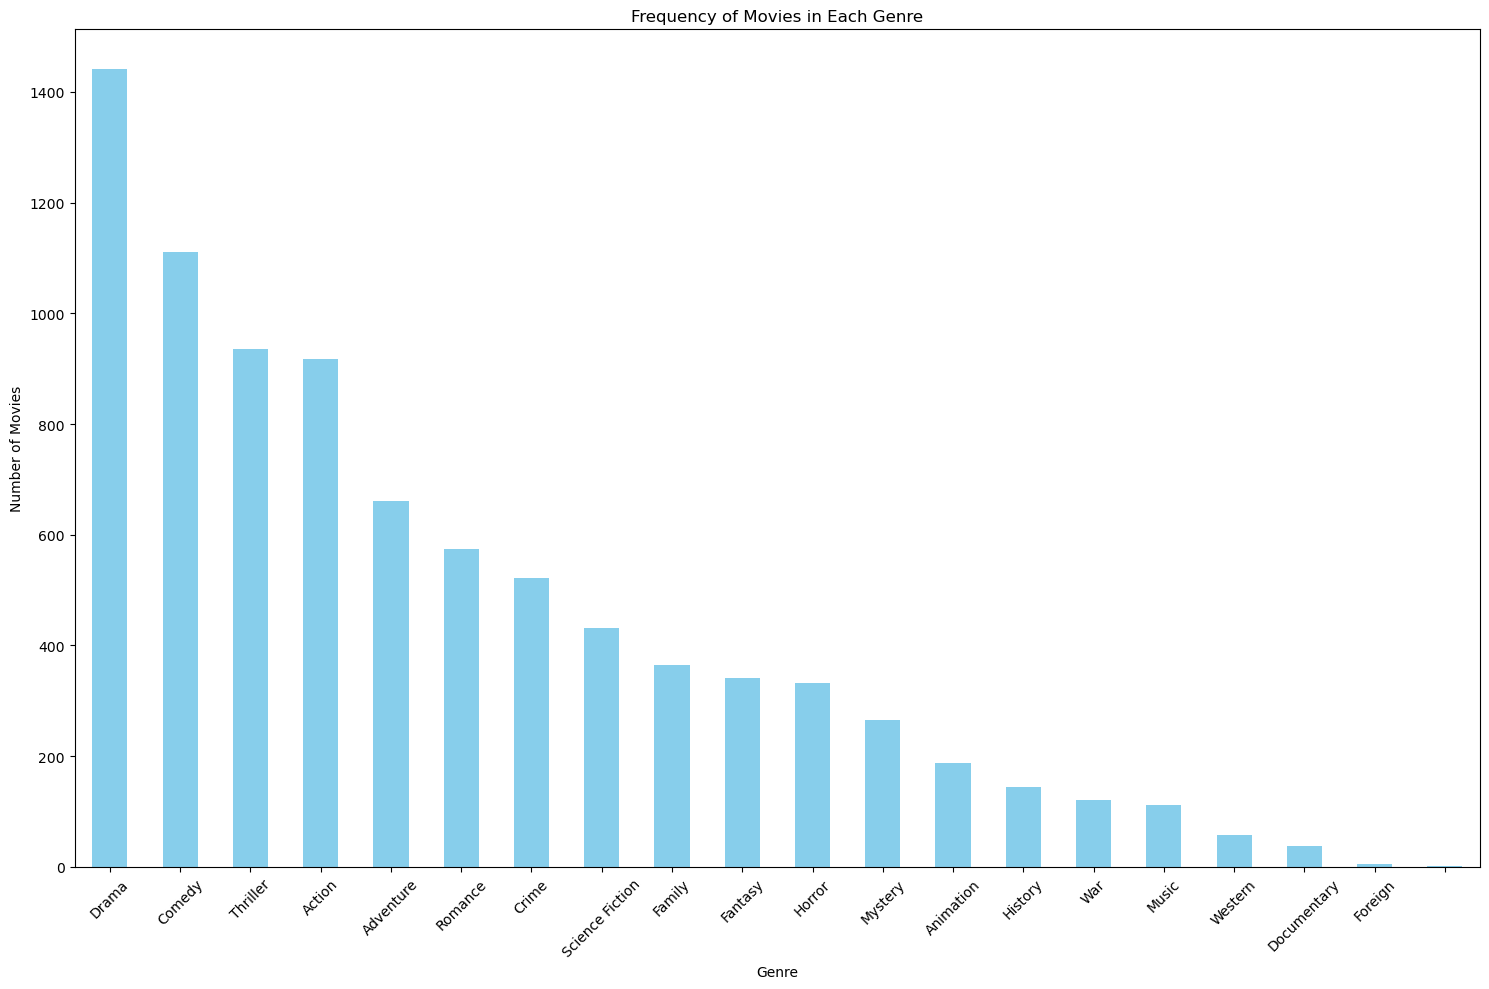

In [36]:
# Code here
# creating a list of all genres
all_genres = []
for genres in movies_df['genres']:
    all_genres.extend(genres)

# calculating frequency of each genre
genre_counts = pd.Series(all_genres).value_counts()

# Plotting the bar graph
plt.figure(figsize=(15, 10))
genre_counts.plot(kind='bar', color='skyblue')
plt.title("Frequency of Movies in Each Genre")
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The bar graph tells us that the most frequent genre of movie is drama, followed by comedy, thriller and then action. The least frequent genre is foreign.

# Generate three different interesting visualisations with a data story.

# 1 
Yearly Movie Release Trend

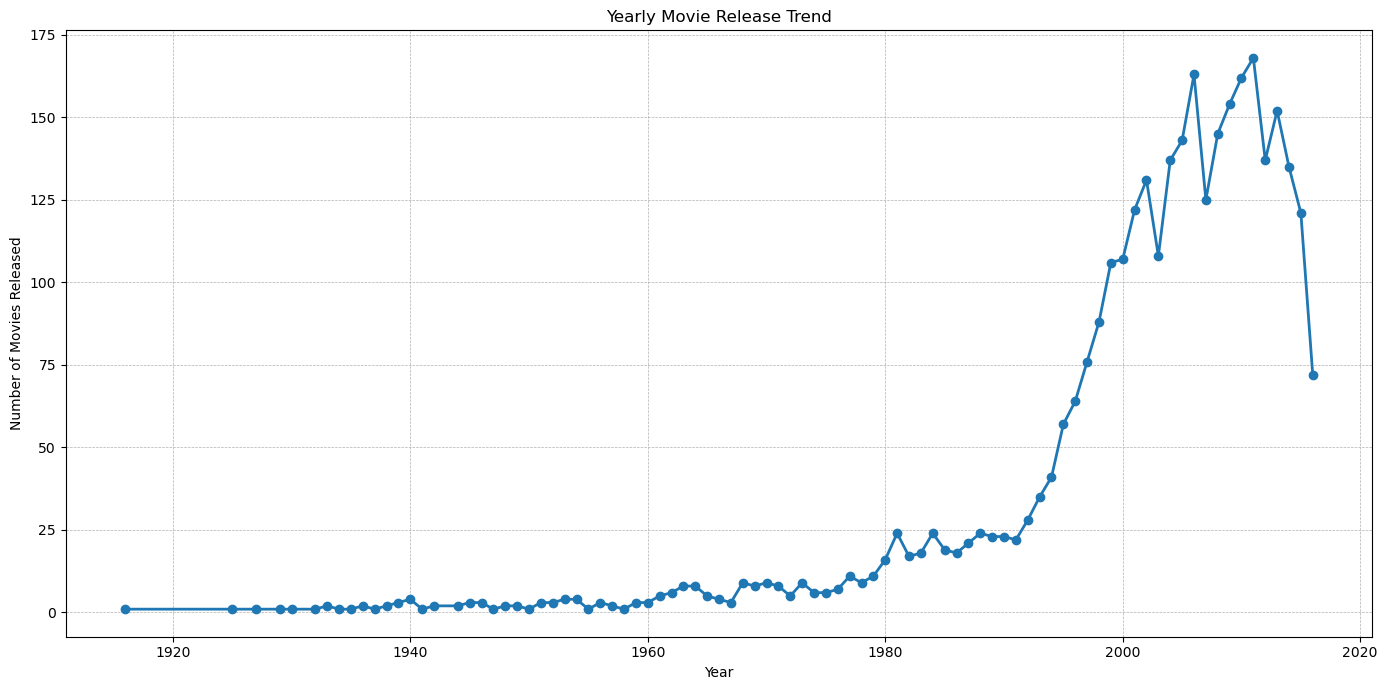

In [37]:
 # Extracting release years
movies_df['release_year'] = movies_df['release_date'].dt.year

# Counting movies for each year
yearly_counts = movies_df['release_year'].value_counts().sort_index()

# Plot
plt.figure(figsize=(14, 7))
yearly_counts.plot(linewidth=2, marker='o')
plt.title("Yearly Movie Release Trend")
plt.xlabel("Year")
plt.ylabel("Number of Movies Released")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

The number of movies being produced has been on the rise over the years from 1980 to 2010. This could be due to advancements in technology making filmmaking more accessible, increased demand for entertainment, or the growth of streaming platforms necessitating more content. From 2018 to 2020 however, there has been a steep decline in the production of movies. One large contributer to this would have been COVID 19.

# 2
Revenue vs. Budget

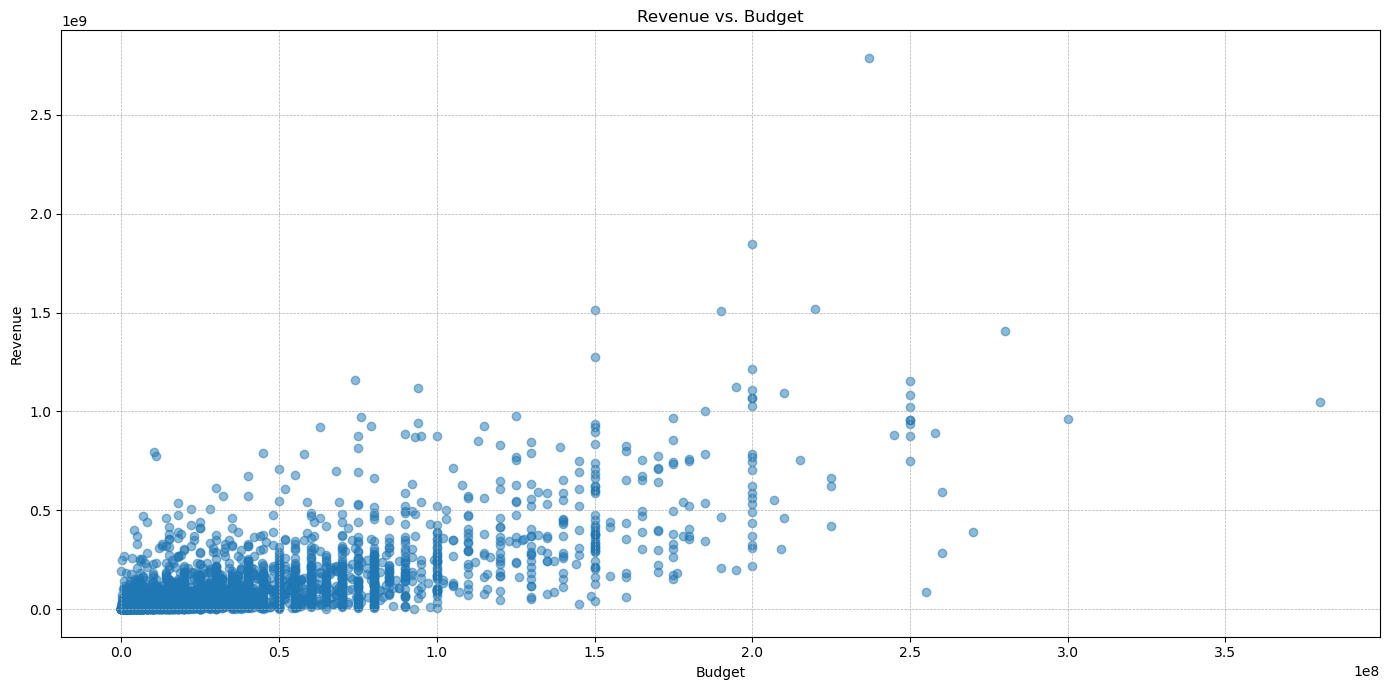

In [38]:
plt.figure(figsize=(14, 7))
plt.scatter(movies_df['budget'], movies_df['revenue'], alpha=0.5)
plt.title("Revenue vs. Budget")
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


Most movies seem to have a positive correlation between budget and revenue, suggesting that investing more often yields better box office results. However, there are exceptions, highlighting that a high budget doesn't guarantee success, and sometimes low-budget movies can have impressive revenues.

# 3
Average Rating Distribution

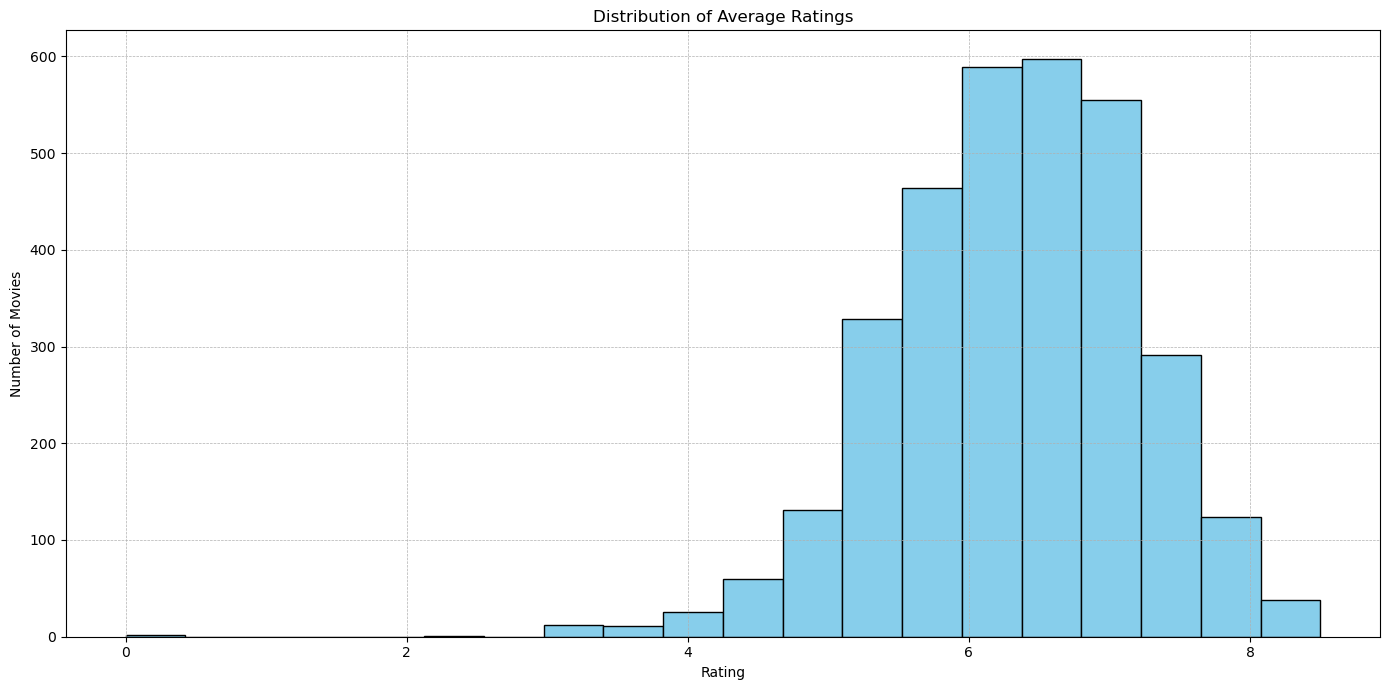

In [39]:
plt.figure(figsize=(14, 7))
movies_df['vote_average'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Average Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Movies")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


The average rating of movies tends to be around the 6-7 range. Few movies receive extremely low or high ratings, indicating that most movies are perceived as average by viewers.